In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
np.random.seed(0)

In [3]:
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]
class1_samples = np.random.multivariate_normal(mu1, sigma1, 250)

mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]
class2_samples = np.random.multivariate_normal(mu2, sigma2, 250)

class1_labels = np.zeros(250)
class2_labels = np.ones(250)

combined_data = np.vstack((class1_samples, class2_samples))
combined_labels = np.hstack((class1_labels, class2_labels))

In [4]:
data_with_bias = np.column_stack((np.ones(len(combined_data)), combined_data))


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_with_bias, combined_labels, test_size=0.2, random_state=0)


In [6]:
def step_activation(x):
    return 1 if x >= 0 else 0

def train_perceptron(X, y, learning_rate, max_epochs):
    weights = np.random.rand(X.shape[1])
    for epoch in range(max_epochs):
        for i in range(X.shape[0]):
            prediction = step_activation(np.dot(X[i], weights))
            error = y[i] - prediction
            weights += learning_rate * error * X[i]
    return weights

In [7]:
learning_rate = 0.1
max_epochs = 1000
optimal_weights = train_perceptron(X_train, y_train, learning_rate, max_epochs)

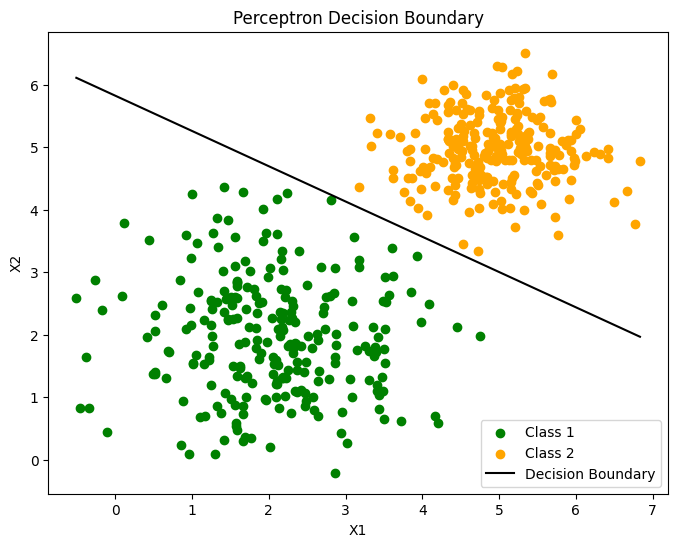

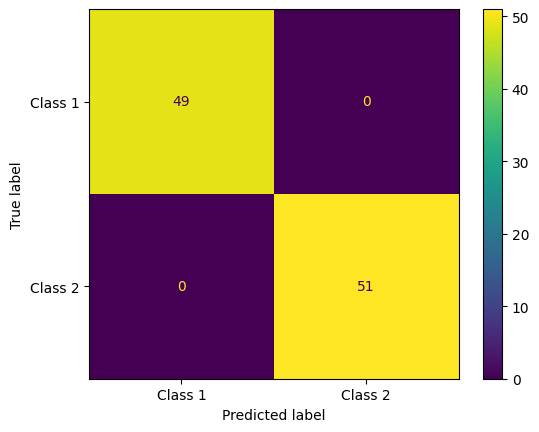

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], color='green', label='Class 1')
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], color='orange', label='Class 2')

x_vals = np.array([np.min(combined_data[:, 0]), np.max(combined_data[:, 0])])
y_vals = -(optimal_weights[0] + optimal_weights[1] * x_vals) / optimal_weights[2]
plt.plot(x_vals, y_vals, color='black', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()

y_pred = [step_activation(np.dot(x, optimal_weights)) for x in X_test]

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Class 1', 'Class 2']).plot()

